In [1]:
from models import *
from torch.utils.data import DataLoader
from torchvision import transforms
from datasets import *
from constants import *
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
device = "cpu"



In [21]:
%%capture
model = DeepLabV3ResNet50(num_classes=1, pretrained=False)
state_dict = torch.load('models/segmentation/1678967702.pth', map_location=torch.device('cpu'))["model"]
model.load_state_dict(state_dict)
model = model.to(device)
model.eval()



Start loading dataset
tensor(1.)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


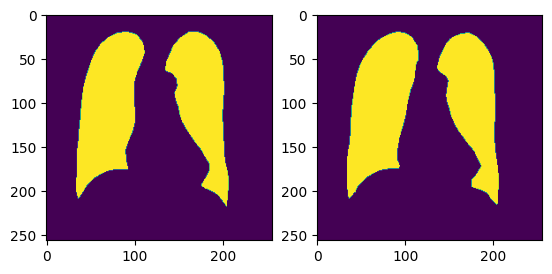

In [46]:
transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]


image_transformation = transforms.Compose(transformation_list)
mask_transformation = transforms.Compose(
    transformation_list)

print("Start loading dataset")

dataset = JSRTDataset(image_folder="data/JSRT/png_images",
                      mask_folder="data/JSRT/masks/both_lungs",
                      image_transform=image_transformation, mask_transform=mask_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


input_data, gt = (next(iter(dataloader)))


with torch.no_grad():
    output = model(input_data)["out"]
    output = output.squeeze()
    output = torch.sigmoid(output)
    print(output.max())
    output = torch.round(output)
    print(output)
    gt = gt.squeeze()
    input_img = transforms.ToPILImage()(gt)
    output_img = transforms.ToPILImage()(output)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(gt)
    ax2.imshow(output_img)

Start loading dataset
tensor(1.)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


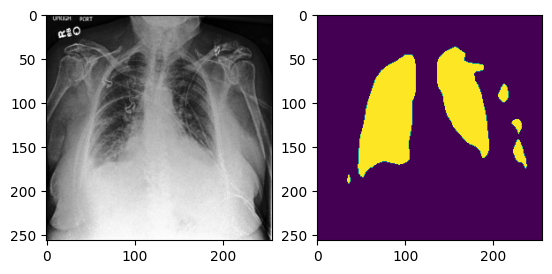

In [45]:
transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]


image_transformation = transforms.Compose(transformation_list)
mask_transformation = transforms.Compose(
    transformation_list)

print("Start loading dataset")

dataset = CheXpertDataset(data_path="./data/CheXpert-v1.0-small/valid.csv",
                               uncertainty_policy="zeros", transform=image_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


input_data, _ = (next(iter(dataloader)))


with torch.no_grad():
    output = model(input_data)["out"]
    output = output.squeeze()
    output = torch.sigmoid(output)
    print(output.max())
    output = torch.round(output)
    print(output)
    input_data = input_data.squeeze()
    input_img = transforms.ToPILImage()(input_data)
    output_img = transforms.ToPILImage()(output)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(input_img)
    ax2.imshow(output_img)